# **Customer Segmentation using KMeans Clustering**

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Loading Dataset

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

###Data Analysis

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Removing the invalid columns from the dataset

In [9]:
customer_data.drop(['CustomerID'] , axis = 1, inplace = True)

In [10]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


###Data Visualization

Distribution Plots to check the variation in data

<ipython-input-11-8676d70b4ebd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[col], bins = 20)
<ipython-input-11-8676d70b4ebd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[col], bins = 20)
<ipython-input-11-8676d70b4ebd>:7: UserWarning: 

`distplot` is a deprec

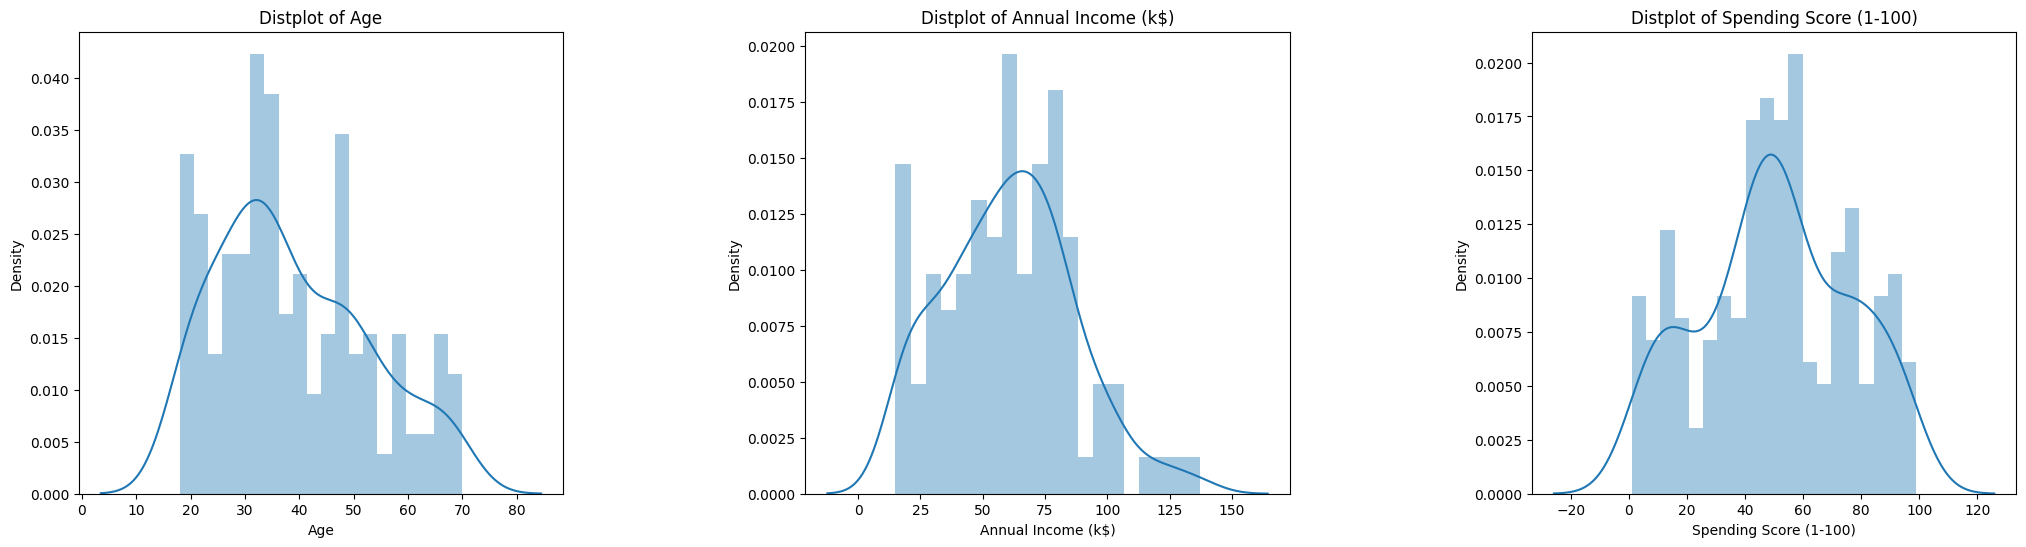

In [11]:
plt.figure(1 ,figsize = (25,6))
n = 0
for col in ['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
  sns.distplot(customer_data[col], bins = 20)
  plt.title(f'Distplot of {col}')
plt.show()

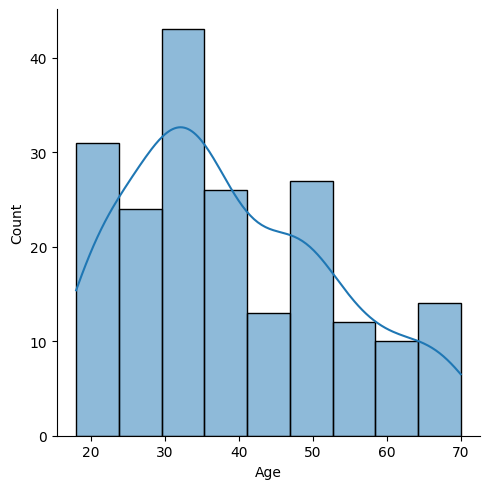

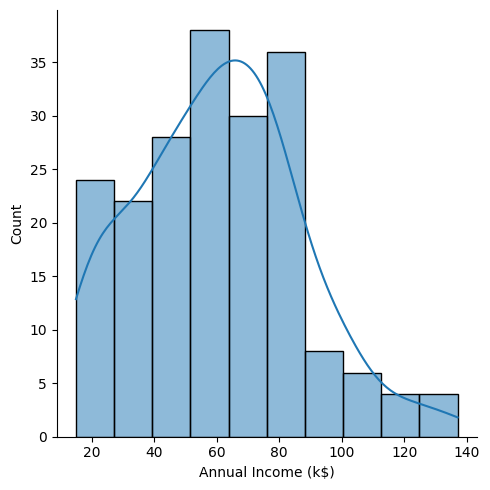

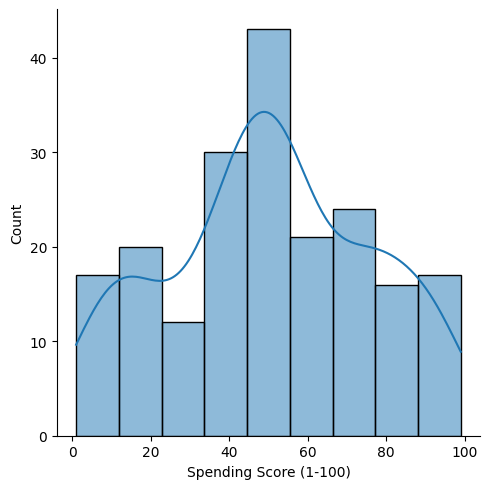

In [12]:
for col in ['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']:
  sns.displot(customer_data[col] , kde = True)

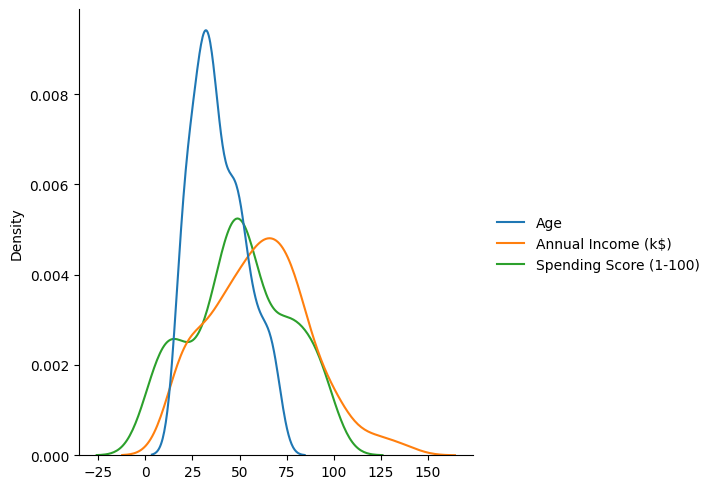

In [13]:
sns.displot(data = customer_data, kind = 'kde')

Count Plot to check male and female count

<Axes: xlabel='count', ylabel='Gender'>

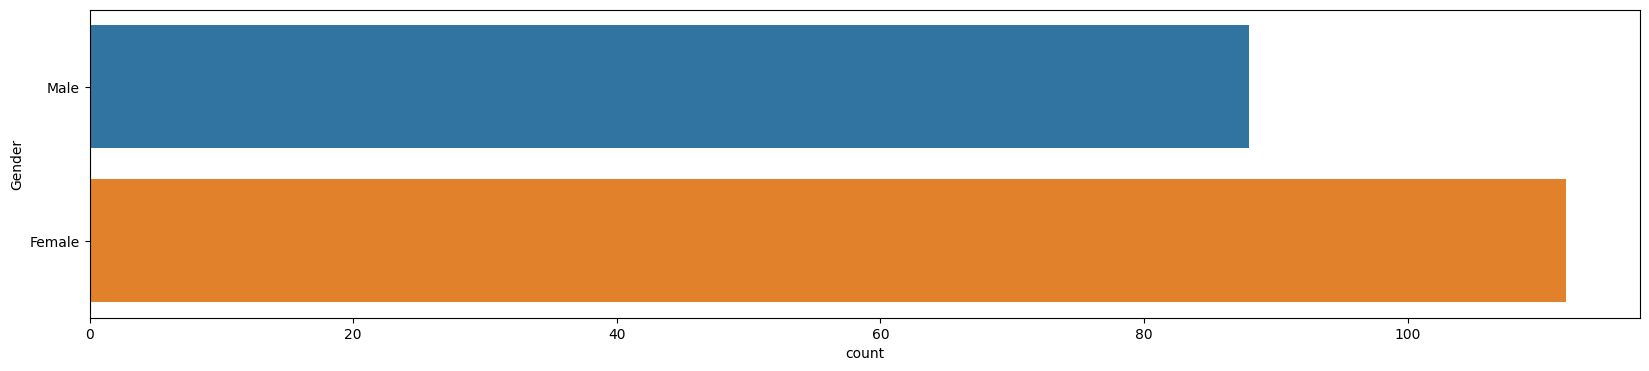

In [14]:
plt.figure(figsize = (20,4))
sns.countplot(data = customer_data , y = 'Gender')


Violin Plot to check the distribution of gender in various attributes

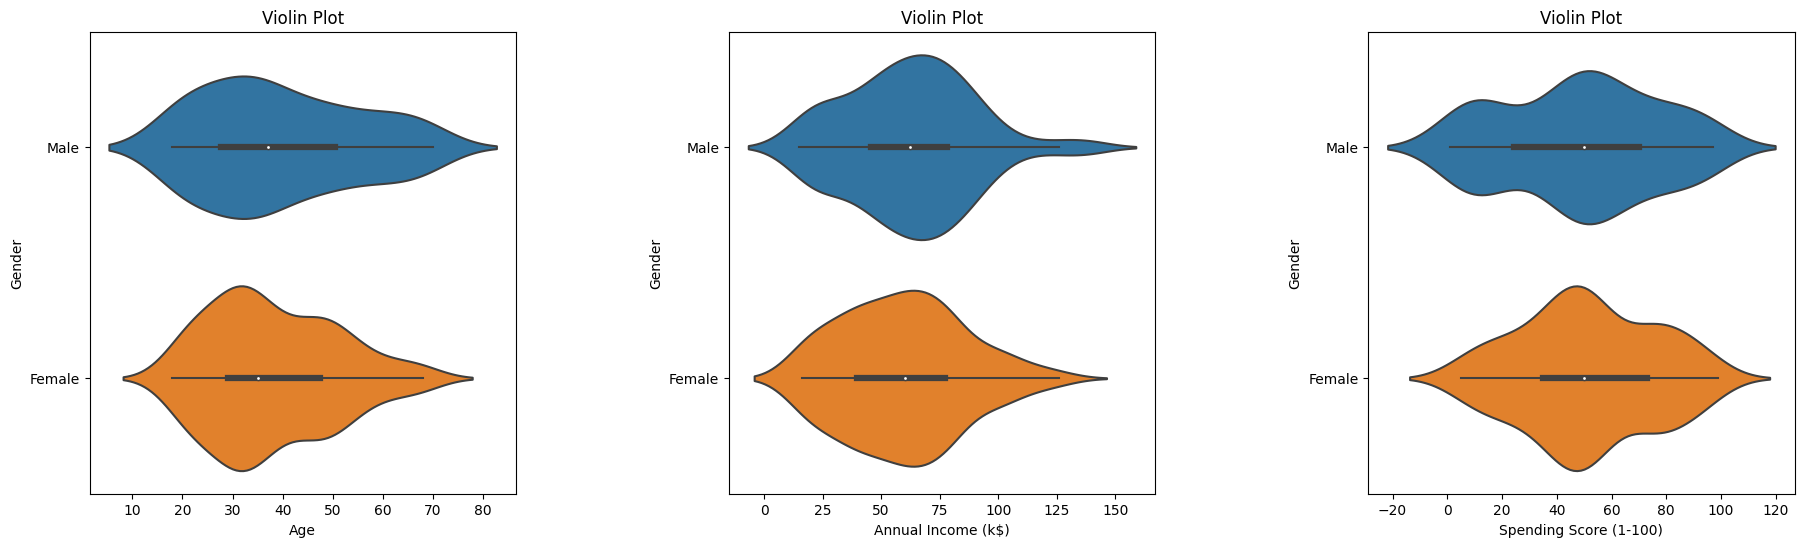

In [15]:
plt.figure(figsize = (22,6))
n = 0
for cols in customer_data.iloc[:,1:4]:
  n += 1
  plt.subplot(1 ,3 ,n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.violinplot(data = customer_data , x = cols , y = 'Gender')
  plt.title('Violin Plot')

Splitting Age into groups:

In [16]:
age_18_25 = customer_data.Age[(customer_data['Age'] >= 18) & (customer_data['Age'] <= 25)]
age_26_35 = customer_data.Age[(customer_data['Age'] >= 26) & (customer_data['Age'] <= 35)]
age_36_45 = customer_data.Age[(customer_data['Age'] >= 36) & (customer_data['Age'] <= 45)]
age_46_55 = customer_data.Age[(customer_data['Age'] >= 46) & (customer_data['Age'] <= 55)]
age_55above = customer_data.Age[(customer_data['Age'] > 56)]

Bar Plot to see the age divisions

Text(0, 0.5, 'Person Count')

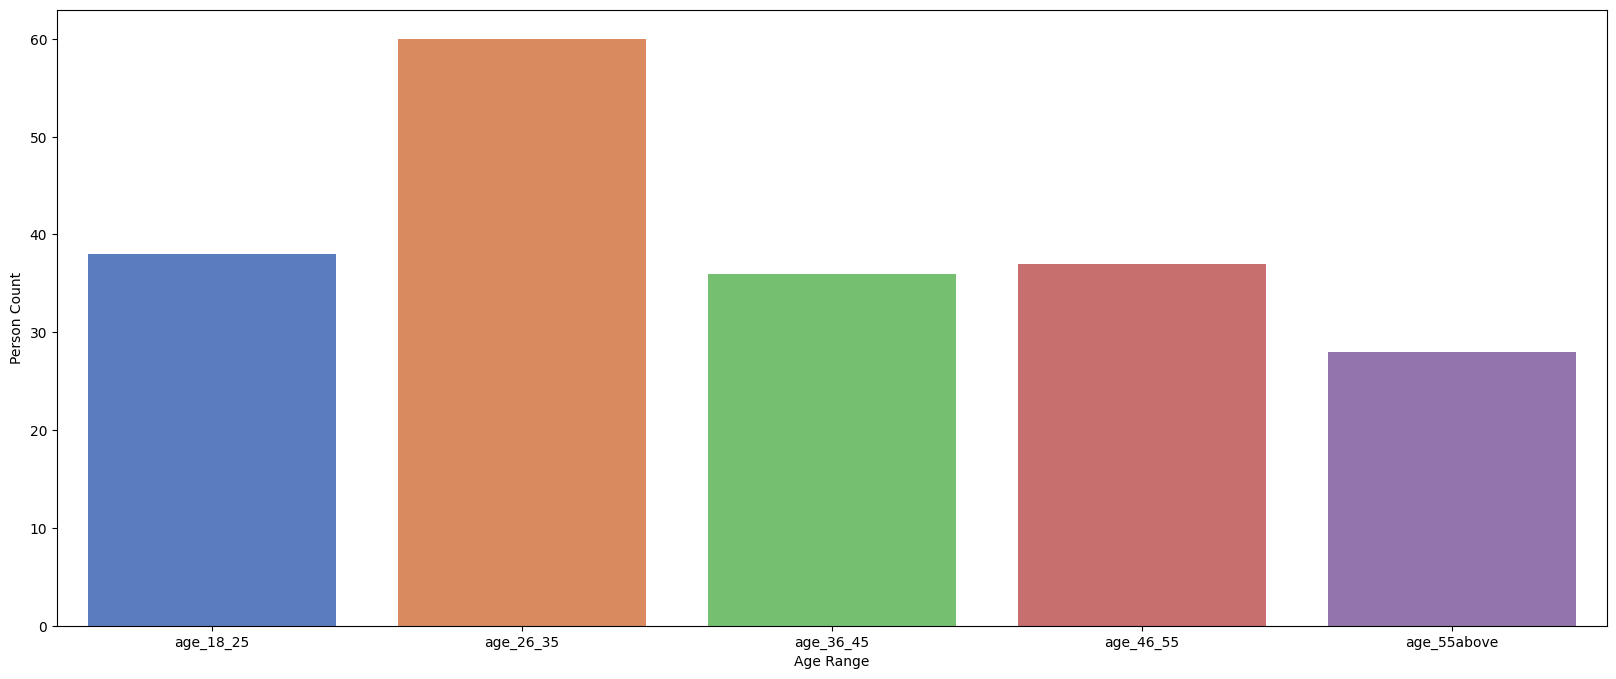

In [17]:
age_x = ['age_18_25', 'age_26_35', 'age_36_45', 'age_46_55', 'age_55above']
age_y = [len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_55above)]

plt.figure(figsize = (20,8))
sns.set_palette('muted')
sns.barplot(x = age_x , y = age_y)
plt.xlabel("Age Range")
plt.ylabel("Person Count")

Scatter Plot to determine relation between Spending Score and Annual Income

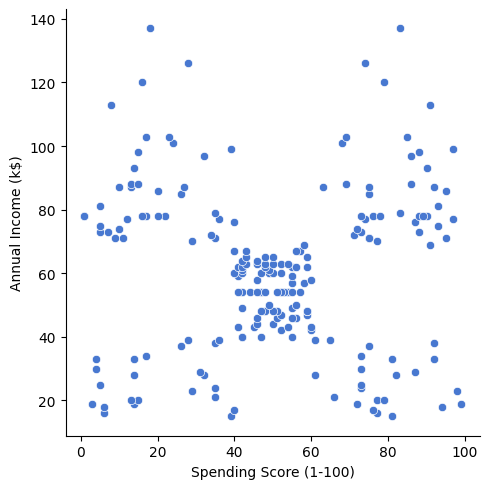

In [18]:
sns.relplot(data = customer_data , x = customer_data["Spending Score (1-100)"], y = customer_data["Annual Income (k$)"])

In [19]:
customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Splitting Spending Score into groups

In [20]:
ss_1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss_21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss_41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss_61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss_81_99 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 99)]

Bar Plot to see the Spending Score divisions

Text(0, 0.5, 'Person Count')

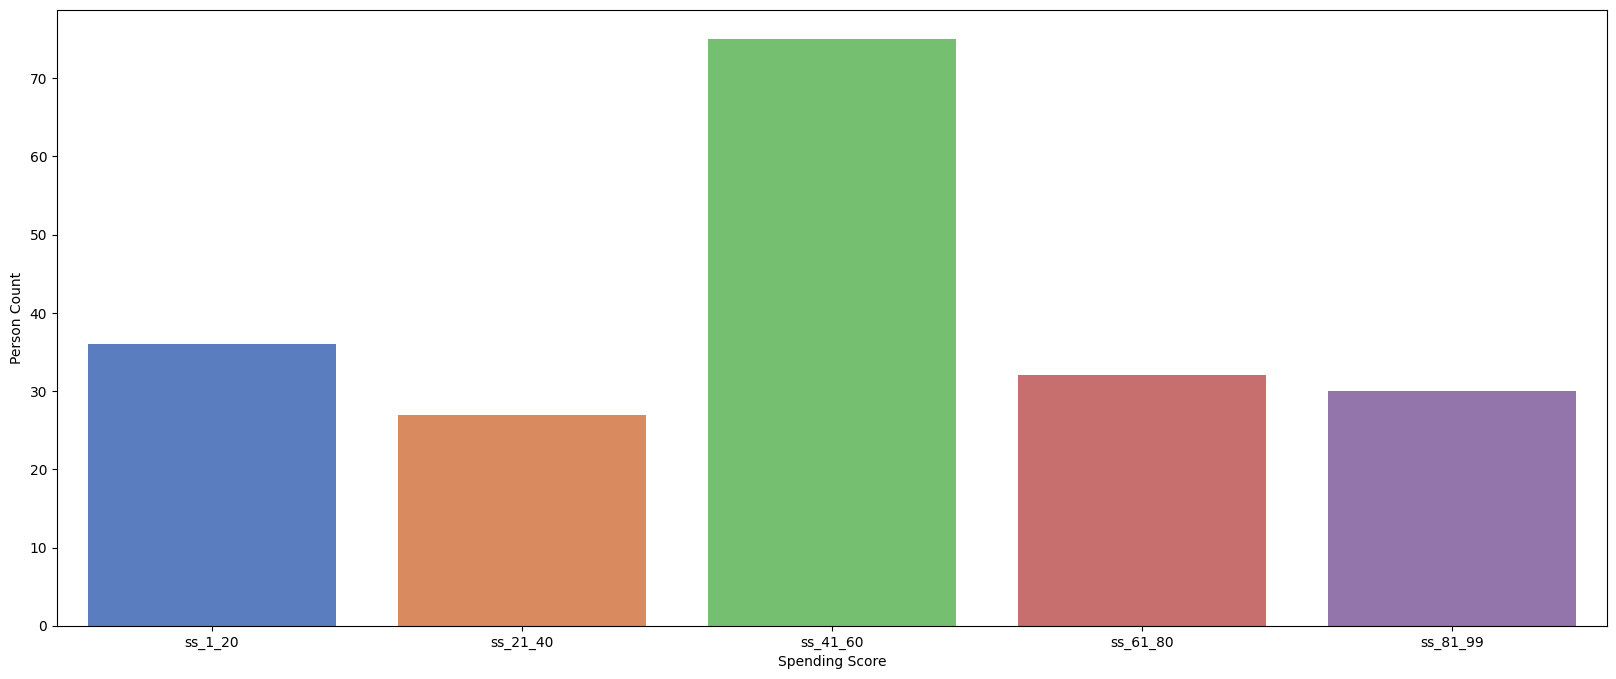

In [21]:
ss_x = ['ss_1_20', 'ss_21_40', 'ss_41_60', 'ss_61_80', 'ss_81_99']
ss_y = [len(ss_1_20),len(ss_21_40),len(ss_41_60),len(ss_61_80),len(ss_81_99),]

plt.figure(figsize = (20,8))
sns.set_palette('muted')
sns.barplot(x = ss_x , y = ss_y)
plt.xlabel('Spending Score')
plt.ylabel('Person Count')

Splitting Annual income into groups

In [22]:
ai_15_40 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 15) & (customer_data['Annual Income (k$)'] < 40)]
ai_40_65 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 40) & (customer_data['Annual Income (k$)'] < 65)]
ai_65_90 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 65) & (customer_data['Annual Income (k$)'] < 90)]
ai_90_115 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 90) & (customer_data['Annual Income (k$)'] < 115)]
ai_115_137 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 115) & (customer_data['Annual Income (k$)'] <= 137)]

Bar Plot todetermine the Annual Income divisions

Text(0, 0.5, 'Person Count')

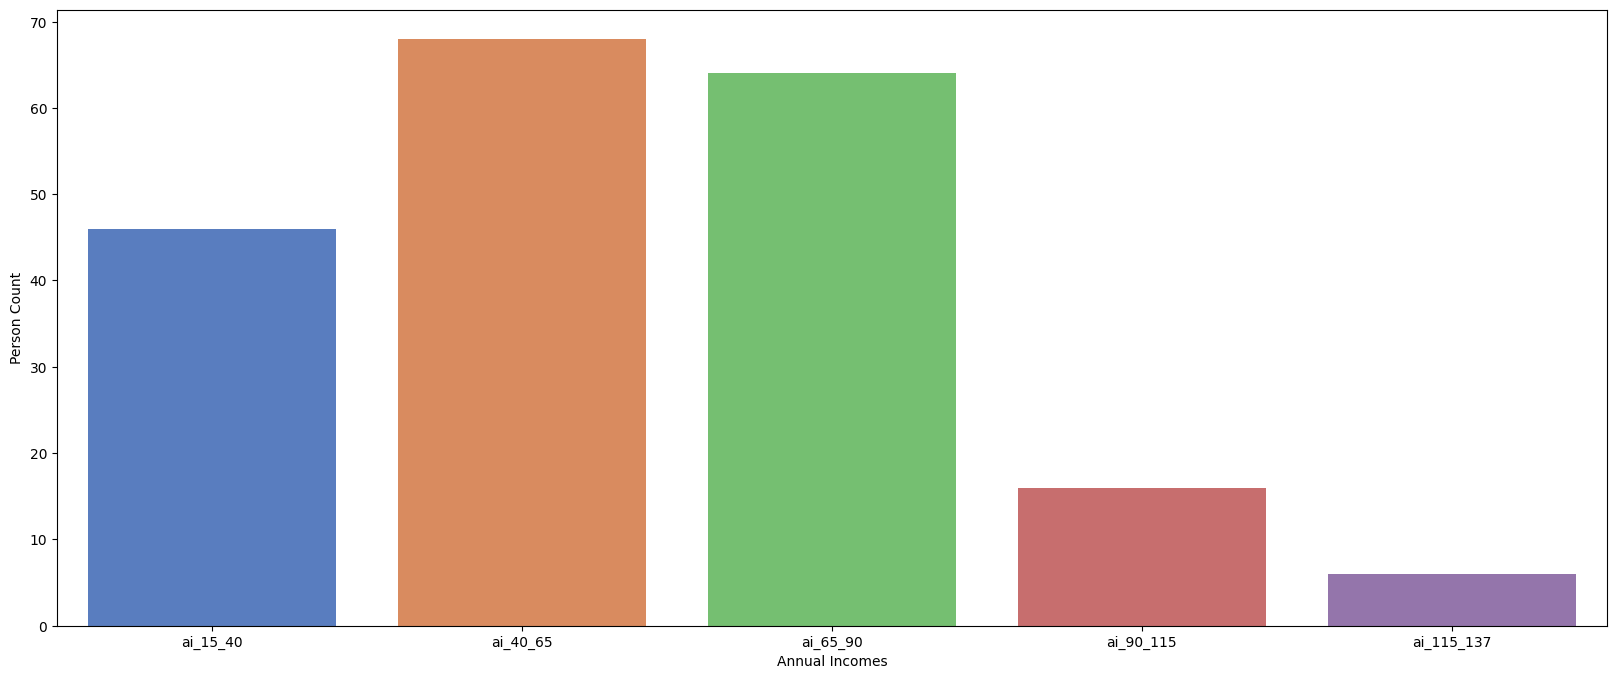

In [23]:
ai_x = ['ai_15_40', 'ai_40_65', 'ai_65_90', 'ai_90_115', 'ai_115_137']
ai_y = [len(ai_15_40),len(ai_40_65),len(ai_65_90),len(ai_90_115),len(ai_115_137)]

plt.figure(figsize = (20,8))
sns.set_palette('muted')
sns.barplot(x = ai_x , y = ai_y)
plt.xlabel('Annual Incomes')
plt.ylabel('Person Count')

### Clustering between Annual Income and Spending Score

Retrieving Annual Income and Spending score from the dataset


In [24]:
X1 = customer_data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

Elbow Plot to determine the optimum number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

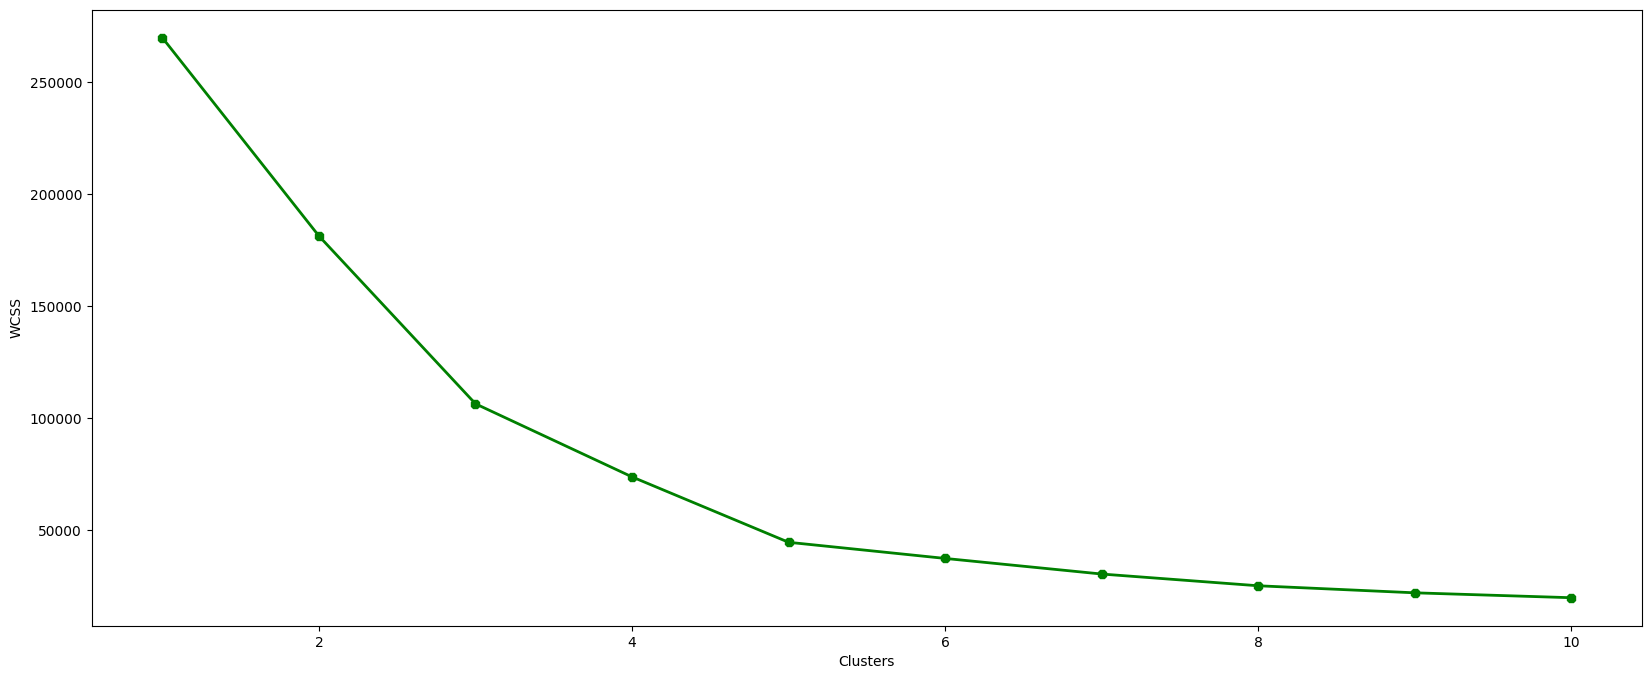

In [25]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (20,8))
plt.plot(range(1,11), wcss, linewidth = '2', marker = '8' , color = 'green')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Number of Clusters = 5

Applying the K-Means Clustering technique on the dataset X1



In [26]:
kmeans = KMeans(n_clusters = 5 , init = "k-means++", random_state = 42)
clusters = kmeans.fit_predict(X1)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting a Scatter Plot to visualize the clusters

Text(0, 0.5, 'Spending Score')

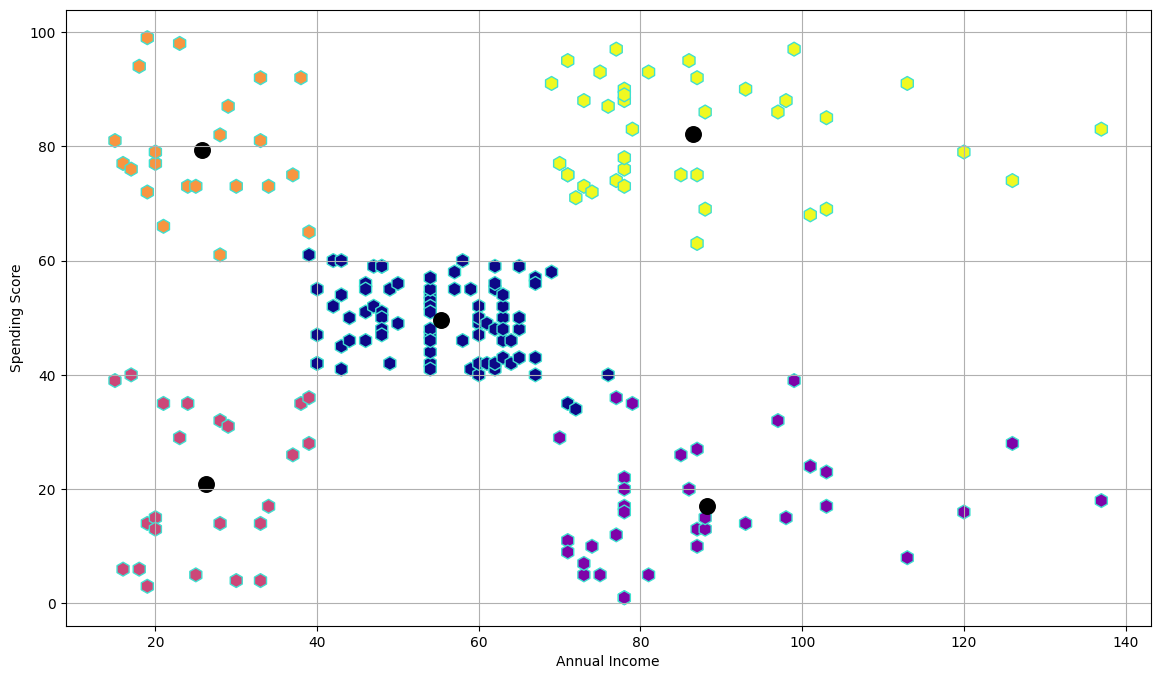

In [27]:
plt.figure(figsize = (14,8))
plt.grid()
plt.scatter(X1[:,0], X1[:,1] , c = kmeans.labels_ , cmap = 'plasma' , marker = 'h', s = 100 , linewidth = 1, edgecolor = 'turquoise')
plt.scatter(centroids[:,0], centroids[:,1], c = "black" , s = 125)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

###Clustering between Age and Spending Score

Retrieving the columns Age and Spending Score from the dataset

In [28]:
X2 = customer_data.loc[:, ['Age', 'Spending Score (1-100)']].values

Elbow Plot to determine the optimum number of clusters 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

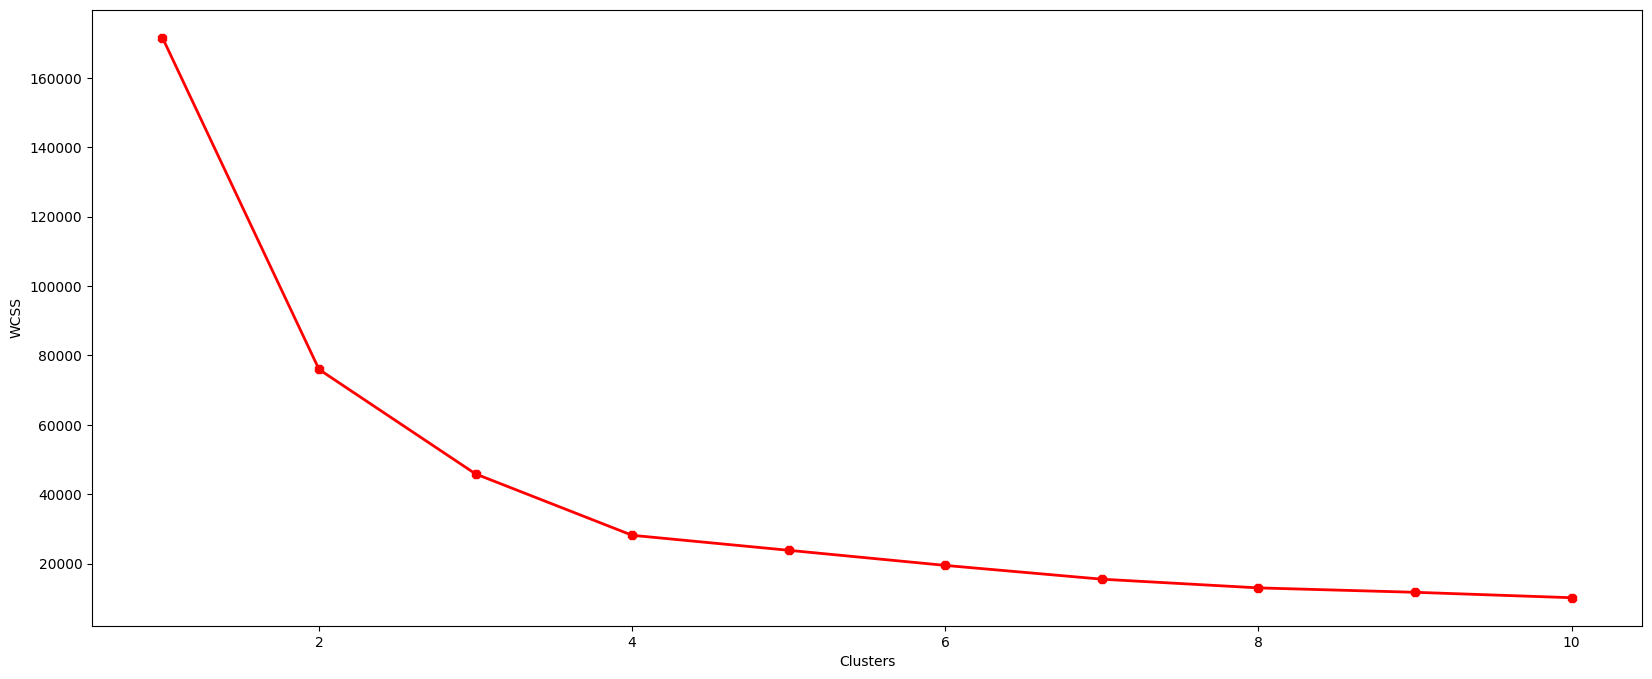

In [29]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (20,8))
plt.plot(range(1,11), wcss , linewidth = 2 , marker = '8', c = 'red')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Number of Clusters = 4

Applying the K-Means Clustering technique on the dataset X2


In [30]:
kmeans = KMeans(n_clusters = 4 , init = "k-means++" , random_state = 1)
clusters = kmeans.fit_predict(X2)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Scatter plot to visualize the clusters

Text(0, 0.5, 'Spending Score')

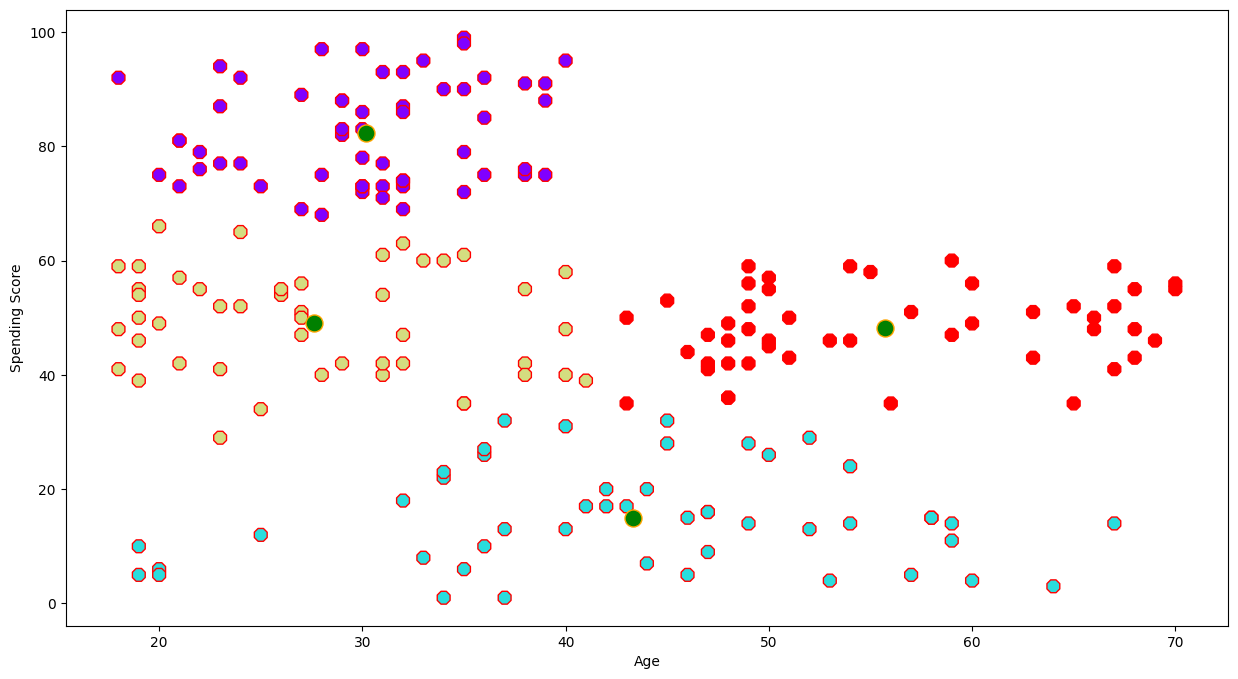

In [31]:
plt.figure(figsize = (15,8))
plt.scatter(X2[:,0], X2[:,1] , c = kmeans.labels_ , cmap = 'rainbow' , marker = '8', edgecolor = 'red' , s = 100)
plt.scatter(centroids[:,0] , centroids[0:,1] , c = 'green' , s = 150 , edgecolor = 'orange')
plt.xlabel('Age')
plt.ylabel('Spending Score')